In [116]:
import pandas as pd
import pca
import numpy as np
import matplotlib.pyplot as plt

In [117]:
df=pd.read_csv('olympic.csv', sep=',')
df.head()

,m100,long,poid,haut,m400,m110,disq,perc,jave,m1500,score
0,-11.25,7.43,15.48,2.27,-48.90,-15.13,49.28,4.7,61.32,-268.95,8488
1,-10.87,7.45,14.97,1.97,-47.71,-14.46,44.36,5.1,61.76,-273.02,8399
2,-11.18,7.44,14.20,1.97,-48.29,-14.81,43.66,5.2,64.16,-263.20,8328
3,-10.62,7.38,15.02,2.03,-49.06,-14.72,44.80,4.9,64.04,-285.11,8306
4,-11.02,7.43,12.92,1.97,-47.44,-14.40,41.20,5.2,57.46,-256.64,8286


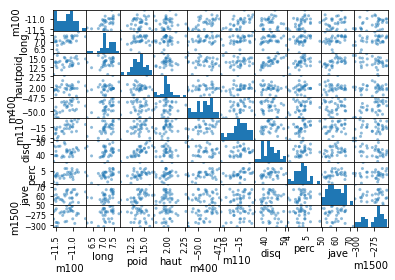

In [118]:
ax1=pd.plotting.scatter_matrix(df.loc[:, 'm100':'m1500'], grid=True) #use loc to remove score column

In [119]:
model = pca.pca(n_components=0.95)
results = model.fit_transform(df.loc[:, 'm100':'m1500'])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


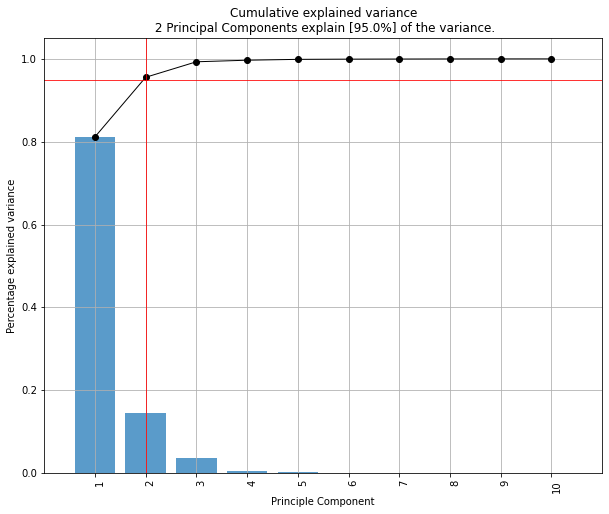

<Figure size 432x288 with 0 Axes>

In [120]:
fig, ax = model.plot()

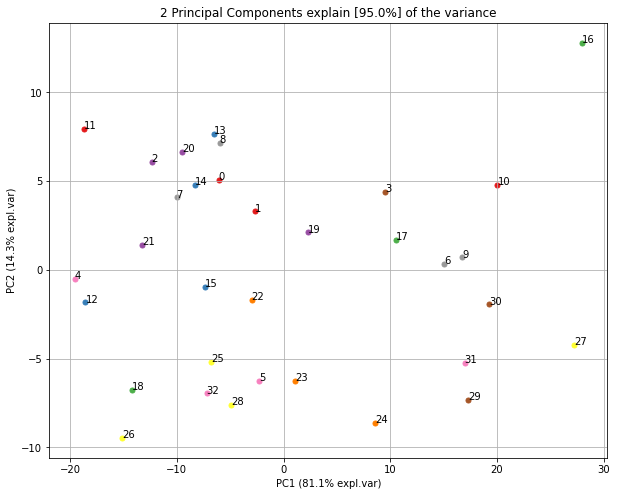

In [121]:
fig, ax = model.scatter(legend=False)

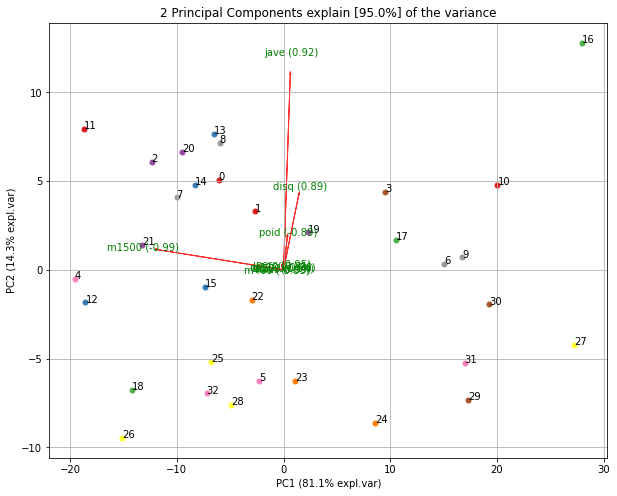

In [122]:
fig, ax = model.biplot(n_feat=10, legend=False)

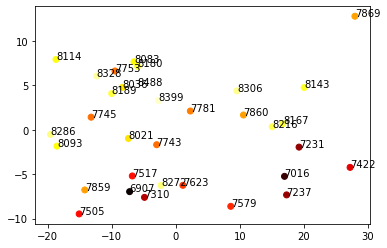

In [123]:
fig, ax=plt.subplots()  
#fig, ax = model.biplot(n_feat=10, legend=False, label=False)
pos1=results['PC']['PC1']
pos2=results['PC']['PC2']
color_score=np.zeros((len(pos1)), )
for i in range(len(pos1)):
    color_score[i]=(df['score'][i]-min(df['score']))/(max(df['score'])-min(df['score']))
    ax.text(pos1[i], pos2[i], s=df['score'][i])
ax.scatter(pos1, pos2, c=color_score, cmap='hot')

In [124]:
results['loadings']

,m100,long,poid,haut,m400,m110,disq,perc,jave,m1500
PC1,-0.004504,-0.008496,0.029493,-0.000715,-0.045589,-0.005044,0.118406,-0.000343,0.052541,-0.990027
PC2,0.005633,0.013772,0.155511,0.002667,-0.001324,0.010836,0.352167,0.019704,0.917593,0.095302
PC3,0.012629,0.011252,0.205411,0.004594,0.068160,0.031890,0.890689,0.029358,-0.387028,0.088636
PC4,-0.168187,-0.135663,-0.177194,-0.006474,-0.847981,-0.398398,0.119608,-0.164300,-0.011127,0.051504
PC5,-0.043526,0.002050,-0.887293,0.000035,0.331802,-0.186480,0.222074,-0.106881,0.071416,-0.010194
PC6,-0.116484,-0.274163,0.323120,-0.109920,0.393530,-0.762887,-0.066701,-0.230857,-0.008440,-0.009992
PC7,-0.103423,-0.001900,-0.053206,-0.000077,-0.012447,-0.298388,-0.007598,0.947208,-0.004189,-0.000464
PC8,-0.232522,-0.907864,-0.052946,-0.012676,0.033281,0.333944,0.014718,0.075627,0.012227,0.006430
PC9,0.943575,-0.280277,-0.056010,-0.050213,-0.082649,-0.121820,0.013015,0.059970,0.002820,0.002592
PC10,0.030685,-0.057116,0.029798,0.992555,0.033937,-0.089180,-0.010752,-0.022750,-0.001348,-0.001937


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


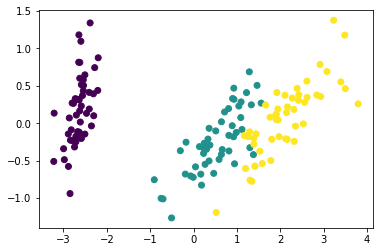

In [130]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

model = pca.pca(n_components=0.95)
results = model.fit_transform(X)

fig, ax=plt.subplots()  
pos1=results['PC']['PC1']
pos2=results['PC']['PC2']
ax.scatter(pos1, pos2, c=y)